# Respiratory Rate on Risk Level

#### Question:
Is there a difference in the respiratory rates in each risk category?
#### Null Hypothesis:
There is no difference in respiratory rates between risk categories.
#### Alternate Hypothesis:
There is a statisically significant difference in respiratory rates among risk categories.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### ANOVA Test

In [3]:
df = pd.read_csv("health-risk-prediction-anonymized-real-data/Health_Risk_Dataset.csv")
groups = df.groupby("Risk_Level")
new_groups = [group["Respiratory_Rate"].values for name, group in groups]
f_stat, p_val = stats.f_oneway(*new_groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")

ANOVA F-statistic: 724.3706495626739, p-value: 9.680624282634389e-250


### Post Hoc Analysis

In [4]:
tukey = pairwise_tukeyhsd(endog=df["Respiratory_Rate"], groups=df["Risk_Level"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  High    Low  -9.5003   0.0 -10.1621  -8.8384   True
  High Medium   -7.031   0.0  -7.6634  -6.3986   True
  High Normal -12.0804   0.0  -12.838 -11.3228   True
   Low Medium   2.4693   0.0   1.8215    3.117   True
   Low Normal  -2.5801   0.0  -3.3506  -1.8097   True
Medium Normal  -5.0494   0.0  -5.7947  -4.3041   True
-----------------------------------------------------


### Visualization

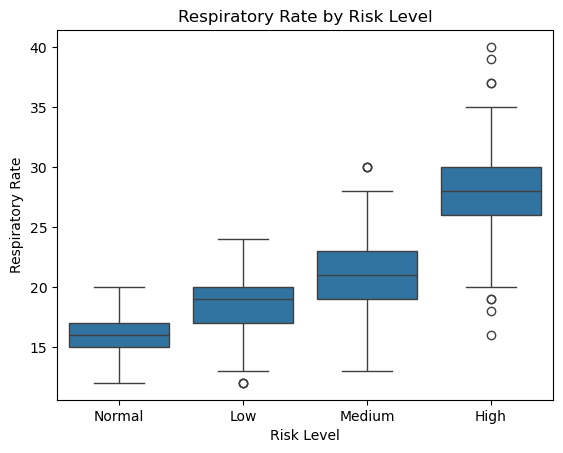

In [5]:
sns.boxplot(x="Risk_Level", y="Respiratory_Rate", data=df, order=["Normal", "Low", "Medium", "High"])
plt.xlabel("Risk Level")
plt.ylabel("Respiratory Rate")
plt.title("Respiratory Rate by Risk Level")
plt.show()

### Analysis

After running a one-way ANOVA on respiratory rates against risk levels, it was found that at least one mean is statistically different among the groups with a p-value less than 0.05. To further investigate this, a post hoc Tukey's HSD was run and determined a relationship such that respiratory rates increase in the following order: normal, low, medium, high. This indicates that each level increase like low to medium, corresponds with an increase in respiratory rate. The data contains outliers with the low, medium, and high levels. However, the data still trends in the direction that an increase in respiratory rate corresponds with an increase in risk level.